In [220]:
#================================================================================================================#
#file name: player22.csv (encoding='ASNI')
#Source: https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset?resource=download
#This code is to analysis the data of player and their wage.
#================================================================================================================#

In [221]:
from sklearnex import patch_sklearn                         #intel 加速補丁
patch_sklearn()                                             #此行後所有import的sklearn package 都會優先導入優化版本
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 70)

In [222]:
#System Structure: Data Preporcessing
data=pd.read_csv("players_22.csv",encoding="ANSI")
data=data.drop(columns=['nationality_name','league_level','league_name','club_name','club_team_id','club_jersey_number',"Unnamed: 110",'player_positions','release_clause_eur','club_contract_valid_until','club_joined','nation_jersey_number','nation_position','nation_team_id','club_loaned_from','nation_jersey_number','body_type','real_face','player_tags','player_traits','long_name','sofifa_id','player_url','player_face_url', 'club_logo_url','club_flag_url', 'nation_logo_url', 'nation_flag_url'])
data=data.iloc[:,0:57]
display(data)
display(data.isnull().sum())

C:\Users\louis\AppData\Local\Temp\ipykernel_9080\288609746.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("players_22.csv",encoding="ANSI")


,short_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_position,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,L. Messi,93,93,78000000.0,320000.0,34,1987/6/24,170,72,RW,52,Left,4,4,5,Medium/Low,85,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8.0,NaN
1,R. Lewandowski,92,92,119500000.0,270000.0,32,1988/8/21,185,81,ST,37,Right,4,4,5,High/Medium,78,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10.0,NaN
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,1985/2/5,187,83,ST,38,Right,4,5,5,High/Low,87,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11.0,NaN
3,Neymar Jr,91,91,129000000.0,270000.0,29,1992/2/5,175,68,LW,54,Right,5,5,5,High/Medium,91,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11.0,NaN
4,K. De Bruyne,91,91,125500000.0,350000.0,30,1991/6/28,181,70,RCM,7,Right,5,4,4,High/High,76,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,52,70000,1000.0,22.0,1999/1/2,180,64,112541,36,China PR,3,2,1,Medium/Medium,Lean (170-185),35,46.0,48.0,42.0,49.0,46.0,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,NaN,44+2
19235,C. Porter,47,59,110000.0,500.0,19,2002/3/18,175,70,RES,25,Right,3,2,1,Medium/Medium,59,39.0,50.0,46.0,41.0,51.0,54,33,46,51,32,41,53,31,50,42,60,58,64,49,69,49,47,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10.0,NaN
19236,N. Logue,47,55,100000.0,500.0,21,2000/2/7,178,72,RES,25,Right,3,2,1,Medium/Medium,60,37.0,45.0,49.0,41.0,52.0,39,32,43,49,37,47,37,37,49,49,60,60,58,46,59,50,57,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6.0,NaN
19237,L. Rudden,47,60,110000.0,500.0,19,2002/4/23,173,66,RES,25,Right,3,2,1,Medium/Medium,68,46.0,36.0,48.0,15.0,42.0,29,49,40,38,34,42,36,34,33,45,69,67,72,48,73,48,50,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15.0,NaN


short_name                         0
overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
dob                                0
height_cm                          0
weight_kg                          0
club_position                     61
nationality_id                     0
preferred_foot                    98
weak_foot                          0
skill_moves                        0
international_reputation           0
work_rate                          0
pace                            2183
shooting                        2132
passing                         2132
dribbling                       2132
defending                       2132
physic                          2064
attacking_crossing                 0
attacking_finishing                0
attacking_heading_accuracy         0
attacking_short_passing            0
attacking_volleys                  0
s

In [223]:
# check outlier and clean missing value
outlier_id=[]
for i in range(0,19239):
    check=data["age"].iloc[i]
    if eval(check)>100:
        outlier_id.append(i)
data_new=data.drop(index=outlier_id,axis=0).reindex(labels=np.arange(0,19091))

outlier_id=[]
for i in range(0,18891):
    check=data['club_position'].iloc[i]
    if type(check)==float:
        outlier_id.append(i)
    elif check.isdigit():
        outlier_id.append(i)
data_new=data_new.drop(index=outlier_id,axis=0).reindex(labels=np.arange(0,18557))
display(data_new)
#replace missing value with 0 or mean value
data_new["goalkeeping_speed"]=data_new["goalkeeping_speed"].fillna(0)
data_new['value_eur']=data_new['value_eur'].fillna(data_new['value_eur'].mean())
data_new['goalkeeping_reflexes']=data_new['goalkeeping_reflexes'].fillna(data_new['goalkeeping_reflexes'].mean())
index=data_new[data_new["short_name"].isnull()].index
data_new=data_new.drop(labels=index)
data_new=data_new.fillna(0)


#Label encoder:club_position
le=LabelEncoder()
position_label=le.fit_transform(data_new["club_position"])
df=pd.DataFrame(position_label,columns=["position_label"])
data_new=pd.concat([data_new.reset_index(),df],axis=1)
display(data_new)
display(data_new.isnull().sum())


,short_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_position,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,L. Messi,93,93.0,78000000.0,320000.0,34,1987/6/24,170,72.0,RW,52,Left,4,4.0,5,Medium/Low,85,92.0,91.0,95.0,34.0,65.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,NaN
1,R. Lewandowski,92,92.0,119500000.0,270000.0,32,1988/8/21,185,81.0,ST,37,Right,4,4.0,5,High/Medium,78,92.0,79.0,86.0,44.0,82.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,93.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,NaN
2,Cristiano Ronaldo,91,91.0,45000000.0,270000.0,36,1985/2/5,187,83.0,ST,38,Right,4,5.0,5,High/Low,87,94.0,80.0,88.0,34.0,75.0,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,85.0,88.0,86.0,94.0,74.0,94.0,95.0,77.0,77.0,93.0,63.0,29.0,95.0,76.0,88.0,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,NaN
3,Neymar Jr,91,91.0,129000000.0,270000.0,29,1992/2/5,175,68.0,LW,54,Right,5,5.0,5,High/Medium,91,83.0,86.0,94.0,37.0,63.0,85.0,83.0,63.0,86.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,96.0,89.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,93.0,93.0,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0,NaN
4,K. De Bruyne,91,91.0,125500000.0,350000.0,30,1991/6/28,181,70.0,RCM,7,Right,5,4.0,4,High/High,76,86.0,93.0,88.0,64.0,78.0,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18552,V. Lund,53,69.0,220000.0,800.0,18,2003/5/28,183,73.0,RES,13,Left,3,2.0,1,Medium/Medium,64,28.0,42.0,47.0,52.0,57.0,39.0,25.0,49.0,51.0,39.0,44.0,39.0,28.0,45.0,48.0,64.0,64.0,48.0,49.0,62.0,36.0,71.0,53.0,59.0,26.0,54.0,49.0,21.0,33.0,30.0,41.0,51.0,55.0,52.0,6.0,11.0,10.0,12.0,12.0,NaN
18553,H. Al Zahrani,53,64.0,200000.0,4000.0,22,1999/4/23,171,65.0,RES,183,Left,3,2.0,1,Medium/Medium,67,30.0,43.0,54.0,49.0,47.0,53.0,25.0,42.0,43.0,27.0,55.0,47.0,36.0,39.0,47.0,68.0,66.0,70.0,49.0,68.0,36.0,43.0,44.0,50.0,29.0,46.0,51.0,50.0,36.0,33.0,42.0,46.0,53.0,52.0,7.0,11.0,7.0,15.0,11.0,NaN
18554,I. Larsson,53,64.0,190000.0,500.0,20,2001/2/1,182,75.0,SUB,46,Right,3,2.0,1,Medium/Medium,64,26.0,40.0,37.0,54.0,58.0,27.0,24.0,50.0,53.0,25.0,31.0,20.0,23.0,51.0,35.0,63.0,64.0,44.0,50.0,62.0,39.0,70.0,62.0,57.0,15.0,52.0,56.0,24.0,33.0,34.0,51.0,54.0,53.0,52.0,7.0,12.0,8.0,6.0,7.0,NaN
18555,D. Watson,53,74.0,300000.0,500.0,17,2003/8/10,177,73.0,RES,42,Right,3,2.0,1,Medium/Low,72,53.0,40.0,54.0,20.0,54.0,33.0,54.0,47.0,43.0,51.0,52.0,44.0,38.0,32.0,51.0,73.0,72.0,66.0,50.0,70.0,55.0,54.0,58.0,52.0,47.0,52.0,18.0,52.0,46.0,54.0,48.0,16.0,17.0,13.0,9.0,12.0,10.0,15.0,12.0,NaN


,index,short_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_position,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position_label
0,0,L. Messi,93,93.0,78000000.0,320000.0,34,1987/6/24,170,72.0,RW,52,Left,4,4.0,5,Medium/Low,85,92.0,91.0,95.0,34.0,65.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,0,25
1,1,R. Lewandowski,92,92.0,119500000.0,270000.0,32,1988/8/21,185,81.0,ST,37,Right,4,4.0,5,High/Medium,78,92.0,79.0,86.0,44.0,82.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,93.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,0,27
2,2,Cristiano Ronaldo,91,91.0,45000000.0,270000.0,36,1985/2/5,187,83.0,ST,38,Right,4,5.0,5,High/Low,87,94.0,80.0,88.0,34.0,75.0,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,85.0,88.0,86.0,94.0,74.0,94.0,95.0,77.0,77.0,93.0,63.0,29.0,95.0,76.0,88.0,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,0,27
3,3,Neymar Jr,91,91.0,129000000.0,270000.0,29,1992/2/5,175,68.0,LW,54,Right,5,5.0,5,High/Medium,91,83.0,86.0,94.0,37.0,63.0,85.0,83.0,63.0,86.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,96.0,89.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,93.0,93.0,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0,0,14
4,4,K. De Bruyne,91,91.0,125500000.0,350000.0,30,1991/6/28,181,70.0,RCM,7,Right,5,4.0,4,High/High,76,86.0,93.0,88.0,64.0,78.0,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18227,18552,V. Lund,53,69.0,220000.0,800.0,18,2003/5/28,183,73.0,RES,13,Left,3,2.0,1,Medium/Medium,64,28.0,42.0,47.0,52.0,57.0,39.0,25.0,49.0,51.0,39.0,44.0,39.0,28.0,45.0,48.0,64.0,64.0,48.0,49.0,62.0,36.0,71.0,53.0,59.0,26.0,54.0,49.0,21.0,33.0,30.0,41.0,51.0,55.0,52.0,6.0,11.0,10.0,12.0,12.0,0,21
18228,18553,H. Al Zahrani,53,64.0,200000.0,4000.0,22,1999/4/23,171,65.0,RES,183,Left,3,2.0,1,Medium/Medium,67,30.0,43.0,54.0,49.0,47.0,53.0,25.0,42.0,43.0,27.0,55.0,47.0,36.0,39.0,47.0,68.0,66.0,70.0,49.0,68.0,36.0,43.0,44.0,50.0,29.0,46.0,51.0,50.0,36.0,33.0,42.0,46.0,53.0,52.0,7.0,11.0,7.0,15.0,11.0,0,21
18229,18554,I. Larsson,53,64.0,190000.0,500.0,20,2001/2/1,182,75.0,SUB,46,Right,3,2.0,1,Medium/Medium,64,26.0,40.0,37.0,54.0,58.0,27.0,24.0,50.0,53.0,25.0,31.0,20.0,23.0,51.0,35.0,63.0,64.0,44.0,50.0,62.0,39.0,70.0,62.0,57.0,15.0,52.0,56.0,24.0,33.0,34.0,51.0,54.0,53.0,52.0,7.0,12.0,8.0,6.0,7.0,0,28
18230,18555,D. Watson,53,74.0,300000.0,500.0,17,2003/8/10,177,73.0,RES,42,Right,3,2.0,1,Medium/Low,72,53.0,40.0,54.0,20.0,54.0,33.0,54.0,47.0,43.0,51.0,52.0,44.0,38.0,32.0,51.0,73.0,72.0,66.0,50.0,70.0,55.0,54.0,58.0,52.0,47.0,52.0,18.0,52.0,46.0,54.0,48.0,16.0,17.0,13.0,9.0,12.0,10.0,15.0,12.0,0,21


index                          0
short_name                     0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
age                            0
dob                            0
height_cm                      0
weight_kg                      0
club_position                  0
nationality_id                 0
preferred_foot                 0
weak_foot                      0
skill_moves                    0
international_reputation       0
work_rate                      0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_a

['LCB', 'RCB', 'GK', 'RB', 'LB', 'ST', 'RCM', 'LCM', 'RM', 'LM', 'CAM', 'RDM', 'LDM', 'RS', 'LS', 'RW', 'LW', 'CB', 'CDM', 'RWB', 'LWB', 'CM', 'LF', 'RF', 'LAM', 'RAM', 'CF']


,LCB,RCB,GK,RB,LB,ST,RCM,LCM,RM,LM,CAM,RDM,LDM,RS,LS,RW,LW,CB,CDM,RWB,LWB,CM,LF,RF,LAM,RAM,CF
club_position,690,685,675,510,510,473,464,461,404,403,288,223,222,221,219,183,181,178,166,114,113,83,35,34,21,21,7


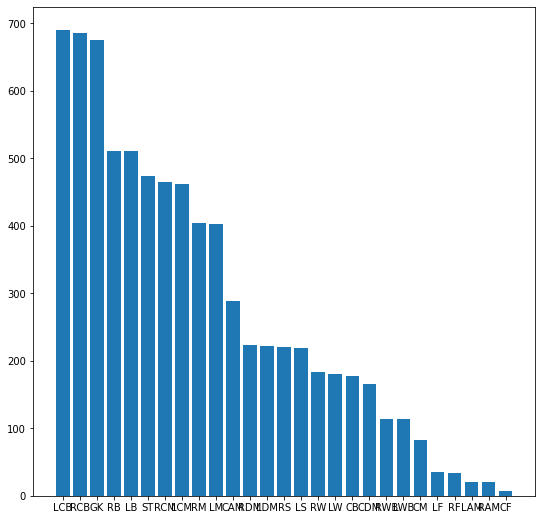

In [224]:
#System Structure: Data mining and feature engineering

pos_label=['LCB', 'RCB', 'GK', 'RB', 'LB', 'ST', 'RCM', 'LCM', 'RM', 'LM', 'CAM', 'RDM', 'LDM', 'RS', 'LS', 'RW', 'LW', 'CB', 'CDM', 'RWB', 'LWB', 'CM', 'LF', 'RF', 'LAM', 'RAM', 'CF']
pos_distribution=data_new['club_position'].value_counts().to_frame().transpose().drop(["SUB",'RES'],axis=1)
print(pos_distribution.columns.tolist())
display(pos_distribution)
plt.figure(figsize=(9,9))
plt.bar(pos_distribution.columns.tolist(),pos_distribution.values.tolist()[0])
plt.show()

C:\Users\louis\AppData\Local\Temp\ipykernel_9080\1667776603.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=data_new[data["club_position"]==i]


Average Overall: [68.41424418604652, 68.52846715328467, 69.77827380952381, 68.33333333333333, 68.33070866141732, 69.58386411889596, 68.46336206896552, 68.60652173913043, 68.9652605459057, 68.72952853598015, 70.61888111888112, 69.05405405405405, 69.40090090090091, 68.49545454545455, 69.47945205479452, 69.07650273224044, 68.97237569060773, 67.73033707865169, 69.63855421686748, 66.51754385964912, 66.67256637168141, 69.3132530120482, 68.91428571428571, 70.11764705882354, 70.57142857142857, 69.76190476190476, 78.85714285714286]
Average Wage: [12602.834302325582, 10822.262773722628, 17266.220238095237, 12584.803921568628, 12777.75590551181, 15799.363057324841, 13178.448275862069, 12262.826086956522, 12190.942928039702, 13116.253101736973, 17926.223776223775, 14574.324324324325, 13955.18018018018, 14313.40909090909, 13895.890410958904, 14863.11475409836, 16727.624309392264, 10021.91011235955, 17022.289156626506, 8125.0, 6066.814159292036, 9707.22891566265, 12555.714285714286, 16898.5294117647

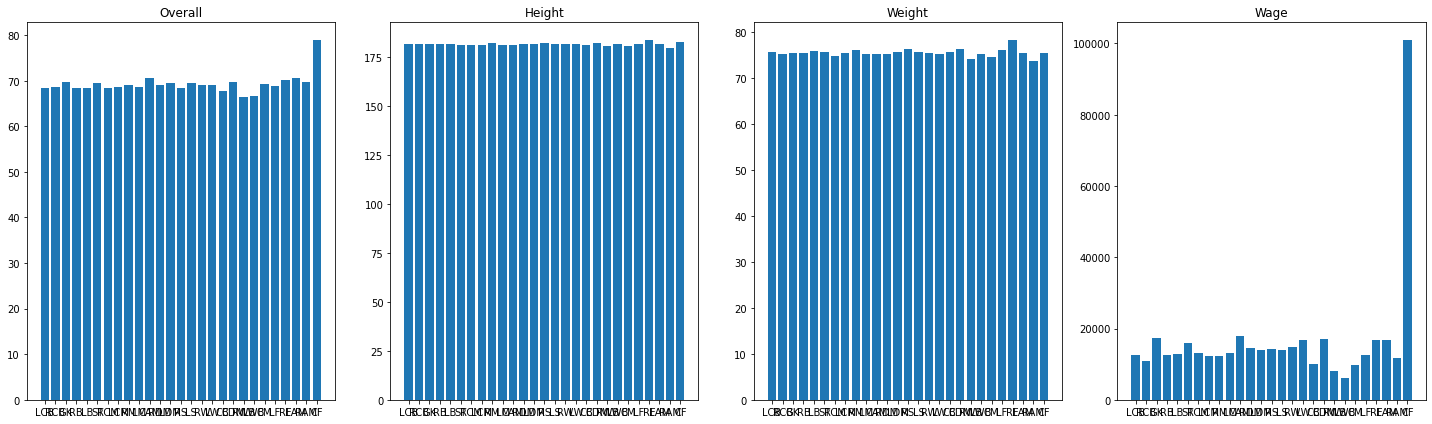

In [225]:
avg_overall=[]
avg_wage=[]
avg_height=[]
avg_weight=[]
for i in pos_label:
    df=data_new[data["club_position"]==i]
    avg_overall.append(df["overall"].astype(float).mean())
    avg_wage.append(df["wage_eur"].astype(float).mean())
    avg_height.append(df["height_cm"].astype(float).mean())
    avg_weight.append(df["weight_kg"].astype(float).mean())
print("Average Overall:",avg_overall)
print("Average Wage:",avg_wage)
print("Average Weight:",avg_weight)
print("Average Height:",avg_height)
fig=plt.figure(figsize=(20,6))
fig.add_subplot(141)
plt.title("Overall")
plt.bar(pos_label,avg_overall)
fig.add_subplot(142)
plt.title("Height")
plt.bar(pos_label,avg_height)
fig.add_subplot(143)
plt.title("Weight")
plt.bar(pos_label,avg_weight)
fig.add_subplot(144)
plt.title("Wage")
plt.bar(pos_label,avg_wage)
plt.tight_layout()
plt.show()

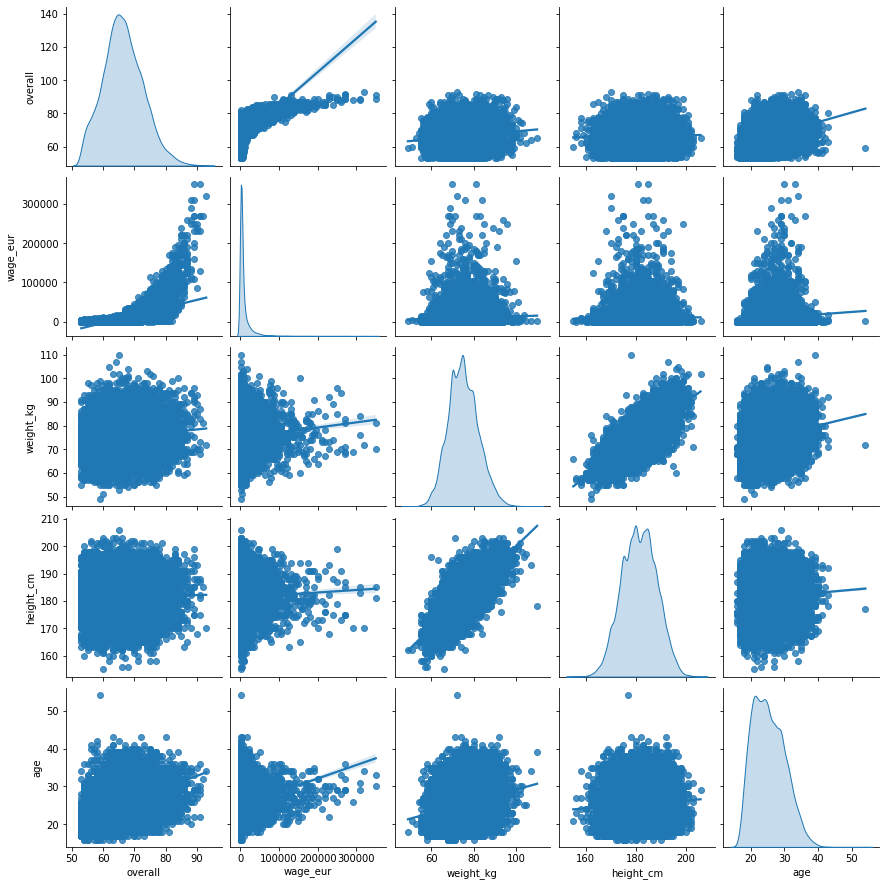

In [226]:
label=["overall",'wage_eur','weight_kg','height_cm','age']
sns.pairplot(data_new[label].astype(float),kind='reg',diag_kind='kde')

Overall:  Index(['wage_eur', 'overall', 'shooting', 'passing', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_reactions', 'power_shot_power',
       'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'mentality_composure'],
      dtype='object')
Position:  Index(['position_label'], dtype='object')
wage:  Index(['wage_eur', 'overall', 'shooting', 'passing', 'dribbling',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_reactions', 'power_shot_power', 'power

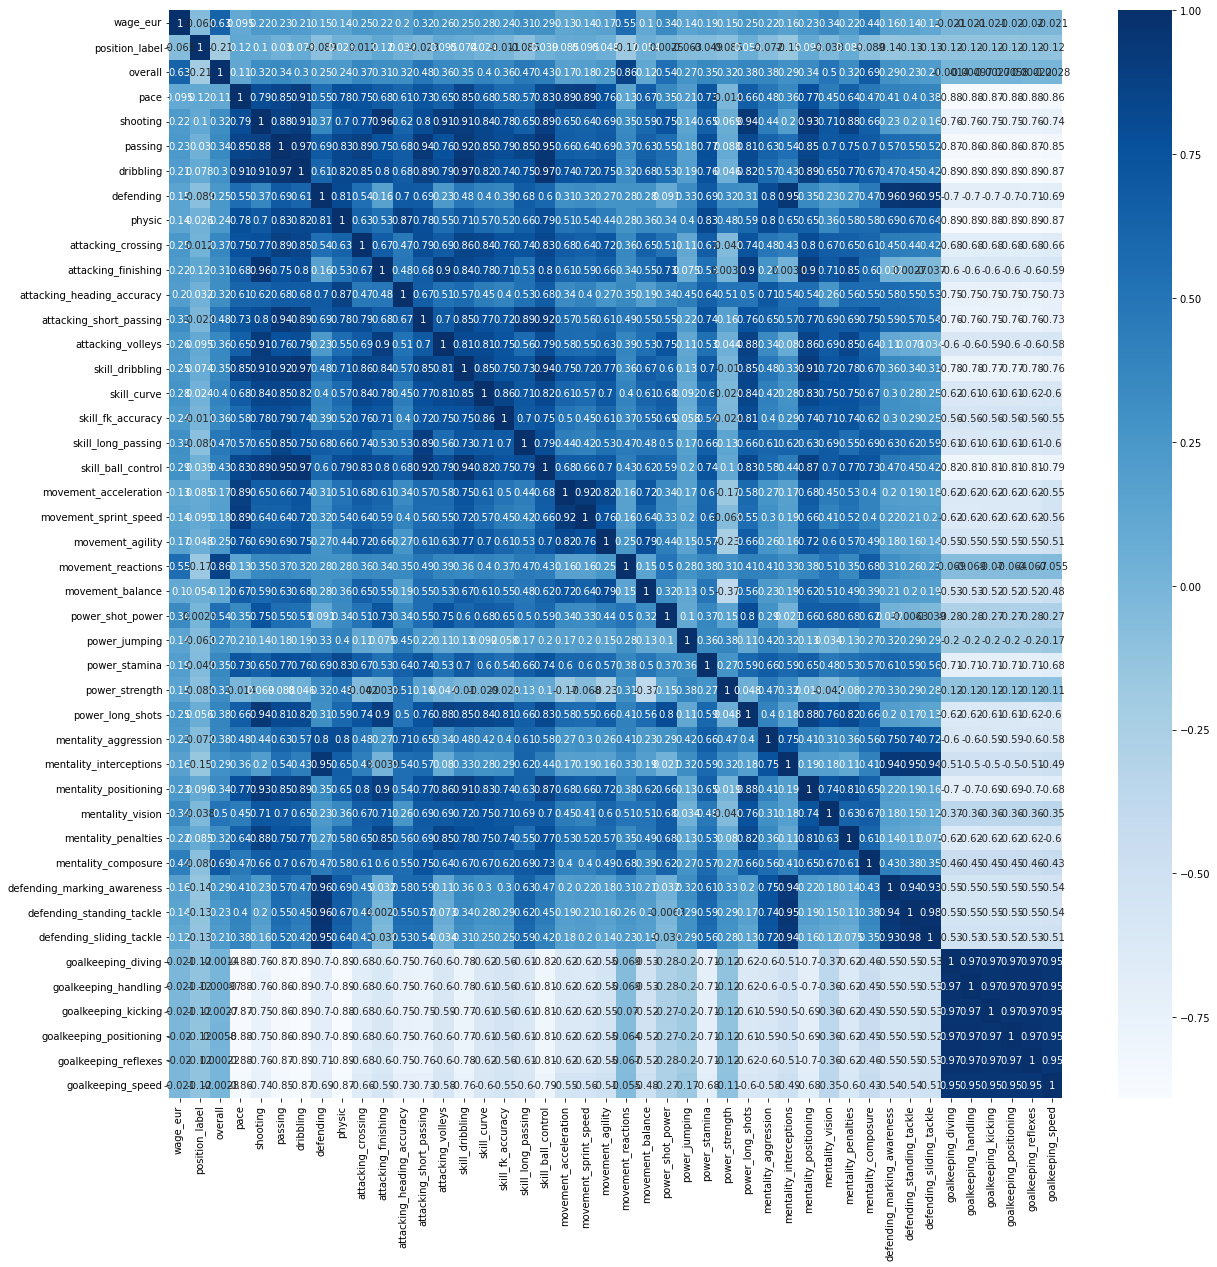

In [230]:
trait_label=['wage_eur','position_label','overall','pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing',	"attacking_volleys","skill_dribbling",	"skill_curve",'skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking_awareness','defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','goalkeeping_speed']
trait=data_new[trait_label].astype(float)
trait_cor=trait.corr()
plt.figure(figsize=(20,20))
sns.heatmap(trait_cor,annot=True,vmax=1,cmap="Blues")
overall_corr=trait_cor.index[abs(trait_cor['overall'])>0.3]
position_corr=trait_cor.index[abs(trait_cor['position_label'])>0.3]
wage_corr=trait_cor.index[abs(trait_cor['wage_eur'])>0.2]
print("Overall: ",overall_corr)
print("Position: ",position_corr)
print("wage: ",wage_corr)

Model:  RandomForestRegressor  ,   Accuracy:  0.9356179492767466 %  
  The top ten important features:  ['movement_reactions' 'wage_eur' 'mentality_composure'
 'skill_ball_control' 'attacking_short_passing' 'skill_dribbling'
 'passing' 'power_shot_power' 'attacking_heading_accuracy'
 'attacking_crossing'] 

Model:  HistGradientBoostingRegressor  Accuracy:  0.9384575971595419 %


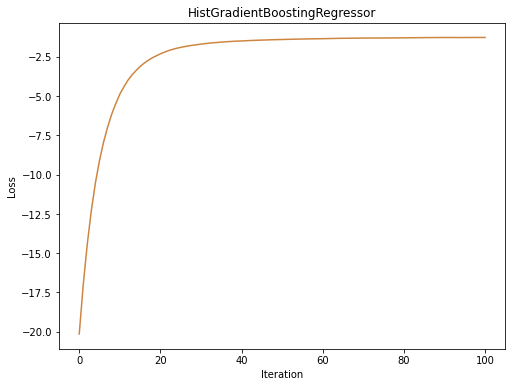

Model:  MLPRegressor  Accuracy:  0.6783073571873728 %


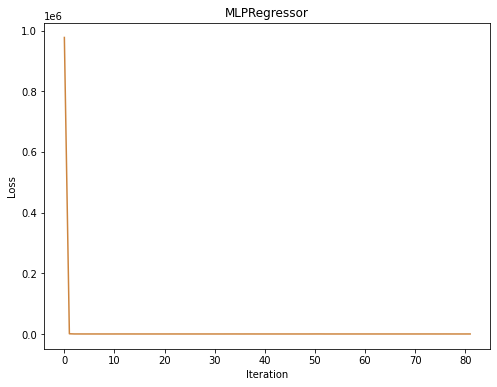

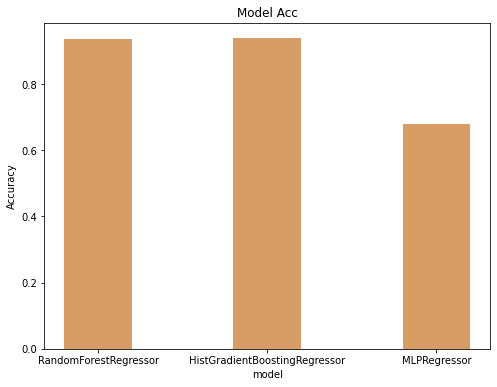

In [279]:
#System Structure: Model Construction and Explaination
#Overall Regression
from sklearn.metrics import accuracy_score,f1_score
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score

rfr_para={"criterion":"squared_error","max_features":'log2'}
HGB_para={"loss":'squared_error',"learning_rate":0.1,"l2_regularization":0.1}
MLP_para={"activation":'relu','solver':'adam',"learning_rate":"adaptive"}
para_dic=[rfr_para,HGB_para,MLP_para]
title=['RandomForestRegressor','HistGradientBoostingRegressor','MLPRegressor']

overall_label=['wage_eur','shooting', 'passing', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_reactions', 'power_shot_power',
       'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'mentality_composure']

acc=[]
for i in range(0,3):
    model=0
    x=data_new[overall_label].astype(float)
    y=data_new['overall']
    X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2023,shuffle=True)
    if para_dic[i]==rfr_para:
       model=RandomForestRegressor(**rfr_para)
       model.fit(X_train,y_train)
       score=model.score(X_test,y_test)
       acc.append(score)
       sortedidx=abs(model.feature_importances_).reshape((23,)).argsort()[::-1]
       print("Model: ",title[i]," , "," Accuracy: ",score,"% ","\n  The top ten important features: ",x.columns.to_numpy()[sortedidx.astype(int)][0:10],'\n')
      
    elif para_dic[i]==HGB_para:
       model=HistGradientBoostingRegressor(**HGB_para)
       model.fit(X_train,y_train)
       score=model.score(X_test,y_test)
       acc.append(score)
       print('Model: ',title[i]," Accuracy: ",score,"%")
       plt.figure(figsize=(8,6))
       plt.title(title[i])
       plt.plot(np.arange(0,model.n_iter_+1),model.validation_score_,color='peru')
       plt.xlabel("Iteration")
       plt.ylabel("Loss")
       plt.show()

    elif para_dic[i]==MLP_para:
       model=MLPRegressor(**MLP_para)
       model.fit(X_train,y_train)
       score=model.score(X_test,y_test)
       acc.append(score)
       print('Model: ',title[i]," Accuracy: ",score,"%")
       loss=model.loss_curve_
       plt.figure(figsize=(8,6))
       plt.title(title[i])
       plt.plot(np.arange(0,model.n_iter_),loss,color='peru')
       plt.xlabel("Iteration")
       plt.ylabel("Loss")
       plt.show()

plt.figure(figsize=(8,6))
plt.title("Model Acc")
plt.bar(title,acc,color='peru',alpha=0.8,width=0.4)
plt.xlabel("model")
plt.ylabel("Accuracy")
plt.show()


Model:  RandomForestRegressor  ,   Accuracy:  0.7691816533576176 %  
  The top three important features:  ['overall' 'movement_reactions' 'skill_ball_control'] 

Model:  HistGradientBoostingRegressor  Accuracy:  0.7859956228749578 %


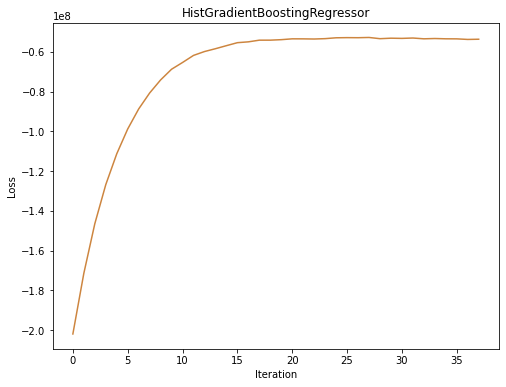

Model:  MLPRegressor  Accuracy:  0.4699467970782487 %


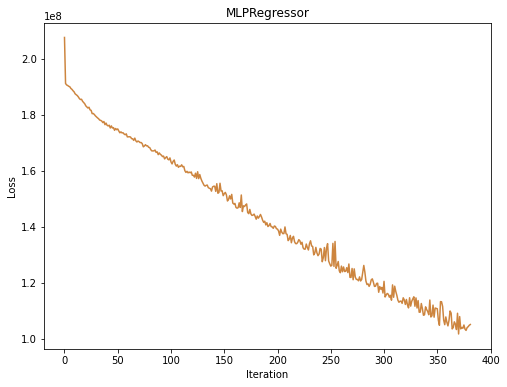

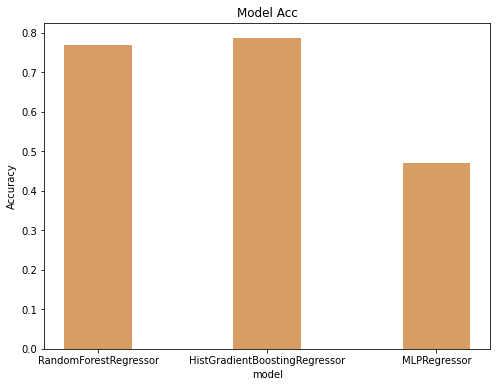

In [280]:
#Wage Regression
from sklearn.metrics import accuracy_score,f1_score
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score

rfr_para={"criterion":"squared_error","max_features":'log2'}
HGB_para={"loss":'squared_error',"learning_rate":0.1,"l2_regularization":0.1}
MLP_para={'max_iter':3000,"activation":'relu','solver':'adam',"learning_rate":"constant","learning_rate_init":0.01,'batch_size':200}
para_dic=[rfr_para,HGB_para,MLP_para]
title=['RandomForestRegressor','HistGradientBoostingRegressor','MLPRegressor']

wage_label=['overall', 'shooting', 'passing', 'dribbling',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_reactions', 'power_shot_power', 'power_long_shots',
       'mentality_aggression', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'mentality_composure']
acc=[]
for i in range(0,3):
    model=0
    x=data_new[wage_label].astype(float)
    y=data_new['wage_eur']
    X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2023,shuffle=True)
    if para_dic[i]==rfr_para:
       model=RandomForestRegressor(**rfr_para)
       model.fit(X_train,y_train)
       score=model.score(X_test,y_test)
       acc.append(score)
       sortedidx=abs(model.feature_importances_).reshape((22,)).argsort()[::-1]
       print("Model: ",title[i]," , "," Accuracy: ",score,"% ","\n  The top ten important features: ",x.columns.to_numpy()[sortedidx.astype(int)][0:10],'\n')
      
    elif para_dic[i]==HGB_para:
       model=HistGradientBoostingRegressor(**HGB_para)
       model.fit(X_train,y_train)
       score=model.score(X_test,y_test)
       acc.append(score)
       print('Model: ',title[i]," Accuracy: ",score,"%")
       plt.figure(figsize=(8,6))
       plt.title(title[i])
       plt.plot(np.arange(0,model.n_iter_+1),model.validation_score_,color='peru')
       plt.xlabel("Iteration")
       plt.ylabel("Loss")
       plt.show()


    elif para_dic[i]==MLP_para:
       model=MLPRegressor(**MLP_para)
       model.fit(X_train,y_train)
       score=model.score(X_test,y_test)
       acc.append(score)
       print('Model: ',title[i]," Accuracy: ",score,"%")
       loss=model.loss_curve_
       plt.figure(figsize=(8,6))
       plt.title(title[i])
       plt.plot(np.arange(0,model.n_iter_),loss,color='peru')
       plt.xlabel("Iteration")
       plt.ylabel("Loss")
       plt.show()

plt.figure(figsize=(8,6))
plt.title("Model Acc")
plt.bar(title,acc,color='peru',alpha=0.8,width=0.4)
plt.xlabel("model")
plt.ylabel("Accuracy")
plt.show()

